In [28]:
import pandas as pd
df = pd.read_csv("./penguins_train.csv")


In [29]:
df.drop("Sex", axis=1, inplace=True)

In [30]:
df.head()

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,Biscoe,Yes,38.8,17.2,180.0,3800.0,9.63954,-25.29856,Adelie Penguin (Pygoscelis adeliae)
1,Torgersen,Yes,41.1,18.6,189.0,3325.0,9.32277,-26.09989,Adelie Penguin (Pygoscelis adeliae)
2,Biscoe,Yes,39.0,17.5,186.0,3550.0,8.57199,-26.07188,Adelie Penguin (Pygoscelis adeliae)
3,Dream,No,39.7,17.9,193.0,4250.0,9.25769,-25.88798,Adelie Penguin (Pygoscelis adeliae)
4,Biscoe,Yes,47.5,14.2,209.0,4600.0,8.39299,-26.78733,Gentoo penguin (Pygoscelis papua)


In [31]:
for i in range(2, 8):
    df.iloc[:, i] = df.iloc[:, i].astype(float)

In [32]:
X = df.drop("Species", axis=1)
y = df["Species"]

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

X["Island"] = encoder.fit_transform(X["Island"])
X["Clutch Completion"] = encoder.fit_transform(X["Clutch Completion"])

y = encoder.fit_transform(y)

In [34]:
for column in X.columns:
    X[column].fillna(X[column].mean(), inplace=True)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [36]:
num_features = len(X.columns)

In [37]:
from sklearn import tree
import random
from sklearn.utils import resample
from collections import Counter
class RandomForest:
    def __init__(self, N, max_features, num_features):
        self.N = N
        self.max_features = max_features
        self.decision_trees = [tree.DecisionTreeClassifier() for _ in range(N)]
        self.seed = [100*int(random.random()) for _ in range(N)]
        self.features_index = [random.sample(range(num_features), max_features) for _ in range(N)]

    def train(self, X, y):
        for i in range(self.N):
            sampled_X, sampled_y = resample(X, y, replace=True, n_samples=len(y)//2)
            self.decision_trees[i].fit(sampled_X.iloc[:, self.features_index[i]], sampled_y)

    def predict(self, X):
        predictions = []
        for i in range(self.N):
            predictions.append(self.decision_trees[i].predict(X.iloc[:, self.features_index[i]]))

        predictions = list(map(list, zip(*predictions)))

        most_voted = [Counter(sample_predictions).most_common(1)[0][0] for sample_predictions in predictions]
        return most_voted


In [38]:
import math
numTrees = 200
max_features = round(math.sqrt(num_features))

In [39]:
forest = RandomForest(numTrees, max_features, num_features)

In [40]:
forest.train(X_train, y_train)

In [41]:
y_pred = forest.predict(X_test)
y_true = y_test

In [45]:
decoded_y_pred = encoder.inverse_transform(y_pred)
print(decoded_y_pred)

['Gentoo penguin (Pygoscelis papua)' 'Gentoo penguin (Pygoscelis papua)'
 'Gentoo penguin (Pygoscelis papua)' 'Gentoo penguin (Pygoscelis papua)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Gentoo penguin (Pygoscelis papua)' 'Adelie Penguin (Pygoscelis adeliae)'
 'Adelie Penguin (Pygoscelis adeliae)'
 'Adelie Penguin (Pygoscelis adeliae)'
 'Adelie Penguin (Pygoscelis adeliae)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Adelie Penguin (Pygoscelis adeliae)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Gentoo penguin (Pygoscelis papua)' 'Adelie Penguin (Pygoscelis adeliae)'
 'Adelie Penguin (Pygoscelis adeliae)'
 'Adelie Penguin (Pygoscelis adeliae)'
 'Adelie Penguin (Pygoscelis adeliae)'
 'Adelie Penguin (Pygoscelis adeliae)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Gentoo penguin (Pygoscelis papua)' 'Adelie Penguin (Pygoscelis adeliae)'
 'Gentoo penguin (Pygoscelis papua)' 'Adelie Pe

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_true, y_pred, average="micro")
print("Precision:", precision)

recall = recall_score(y_true, y_pred, average="micro")
print("Recall:", recall)

f1 = f1_score(y_true, y_pred, average="micro")
print("F1-Score:", f1)


Accuracy: 0.9818181818181818
Precision: 0.9818181818181818
Recall: 0.9818181818181818
F1-Score: 0.9818181818181818


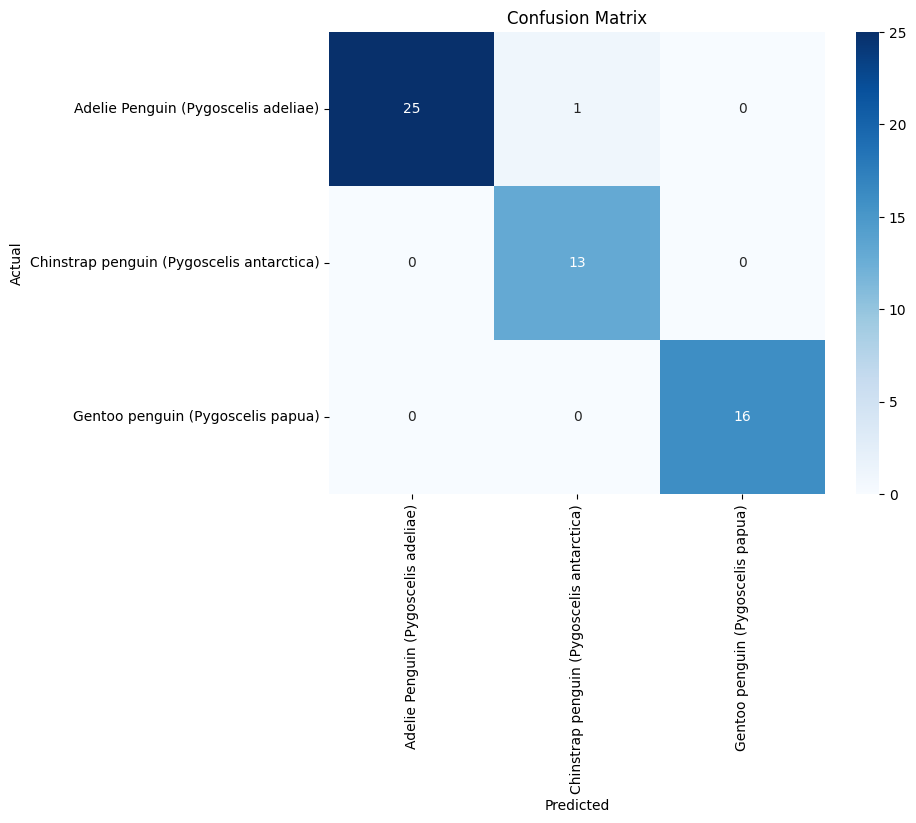

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Create a DataFrame for better visualization
confusion_df = pd.DataFrame(confusion_mat, index=encoder.classes_, columns=encoder.classes_)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()